Read dataset:

In [ ]:
import pandas as pd
df = pd.read_csv('your_data.csv')
df.head()

,Unnamed: 0,weight(kg),Gtp,Urine protein,ALT,LDL,eyesight(left),triglyceride,age,id,hearing(right),smoking
0,0,60,27,1,25,75,0.5,300,55,0,1,1
1,1,65,37,1,23,126,0.6,55,70,1,2,0
2,2,75,53,1,31,93,0.4,197,20,2,1,1
3,3,95,30,1,27,102,1.5,203,35,3,1,0
4,4,60,17,1,13,93,1.5,87,30,4,1,1


In [ ]:
# drop 1. extra column    2. id column
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['id'])
df

,weight(kg),Gtp,Urine protein,ALT,LDL,eyesight(left),triglyceride,age,hearing(right),smoking
0,60,27,1,25,75,0.5,300,55,1,1
1,65,37,1,23,126,0.6,55,70,2,0
2,75,53,1,31,93,0.4,197,20,1,1
3,95,30,1,27,102,1.5,203,35,1,0
4,60,17,1,13,93,1.5,87,30,1,1
...,...,...,...,...,...,...,...,...,...,...
159251,45,13,1,26,159,1.5,47,40,1,0
159252,75,18,1,20,108,1.0,202,50,1,0
159253,50,12,1,9,93,1.5,45,40,1,0
159254,75,37,1,17,80,1.2,148,50,1,1


# **Satitsical** Analysis:

In [ ]:
df.describe()

,weight(kg),Gtp,Urine protein,ALT,LDL,eyesight(left),triglyceride,age,hearing(right),smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,67.143662,36.216004,1.074233,26.550296,114.607682,1.005798,127.616046,44.306626,1.023421,0.437365
std,12.586198,31.204643,0.347856,17.753070,28.158931,0.402113,66.188989,11.842286,0.151238,0.496063
min,30.000000,2.000000,1.000000,1.000000,1.000000,0.100000,8.000000,20.000000,1.000000,0.000000
25%,60.000000,18.000000,1.000000,16.000000,95.000000,0.800000,77.000000,40.000000,1.000000,0.000000
50%,65.000000,27.000000,1.000000,22.000000,114.000000,1.000000,115.000000,40.000000,1.000000,0.000000
75%,75.000000,44.000000,1.000000,32.000000,133.000000,1.200000,165.000000,55.000000,1.000000,1.000000
max,130.000000,999.000000,6.000000,2914.000000,1860.000000,9.900000,766.000000,85.000000,2.000000,1.000000


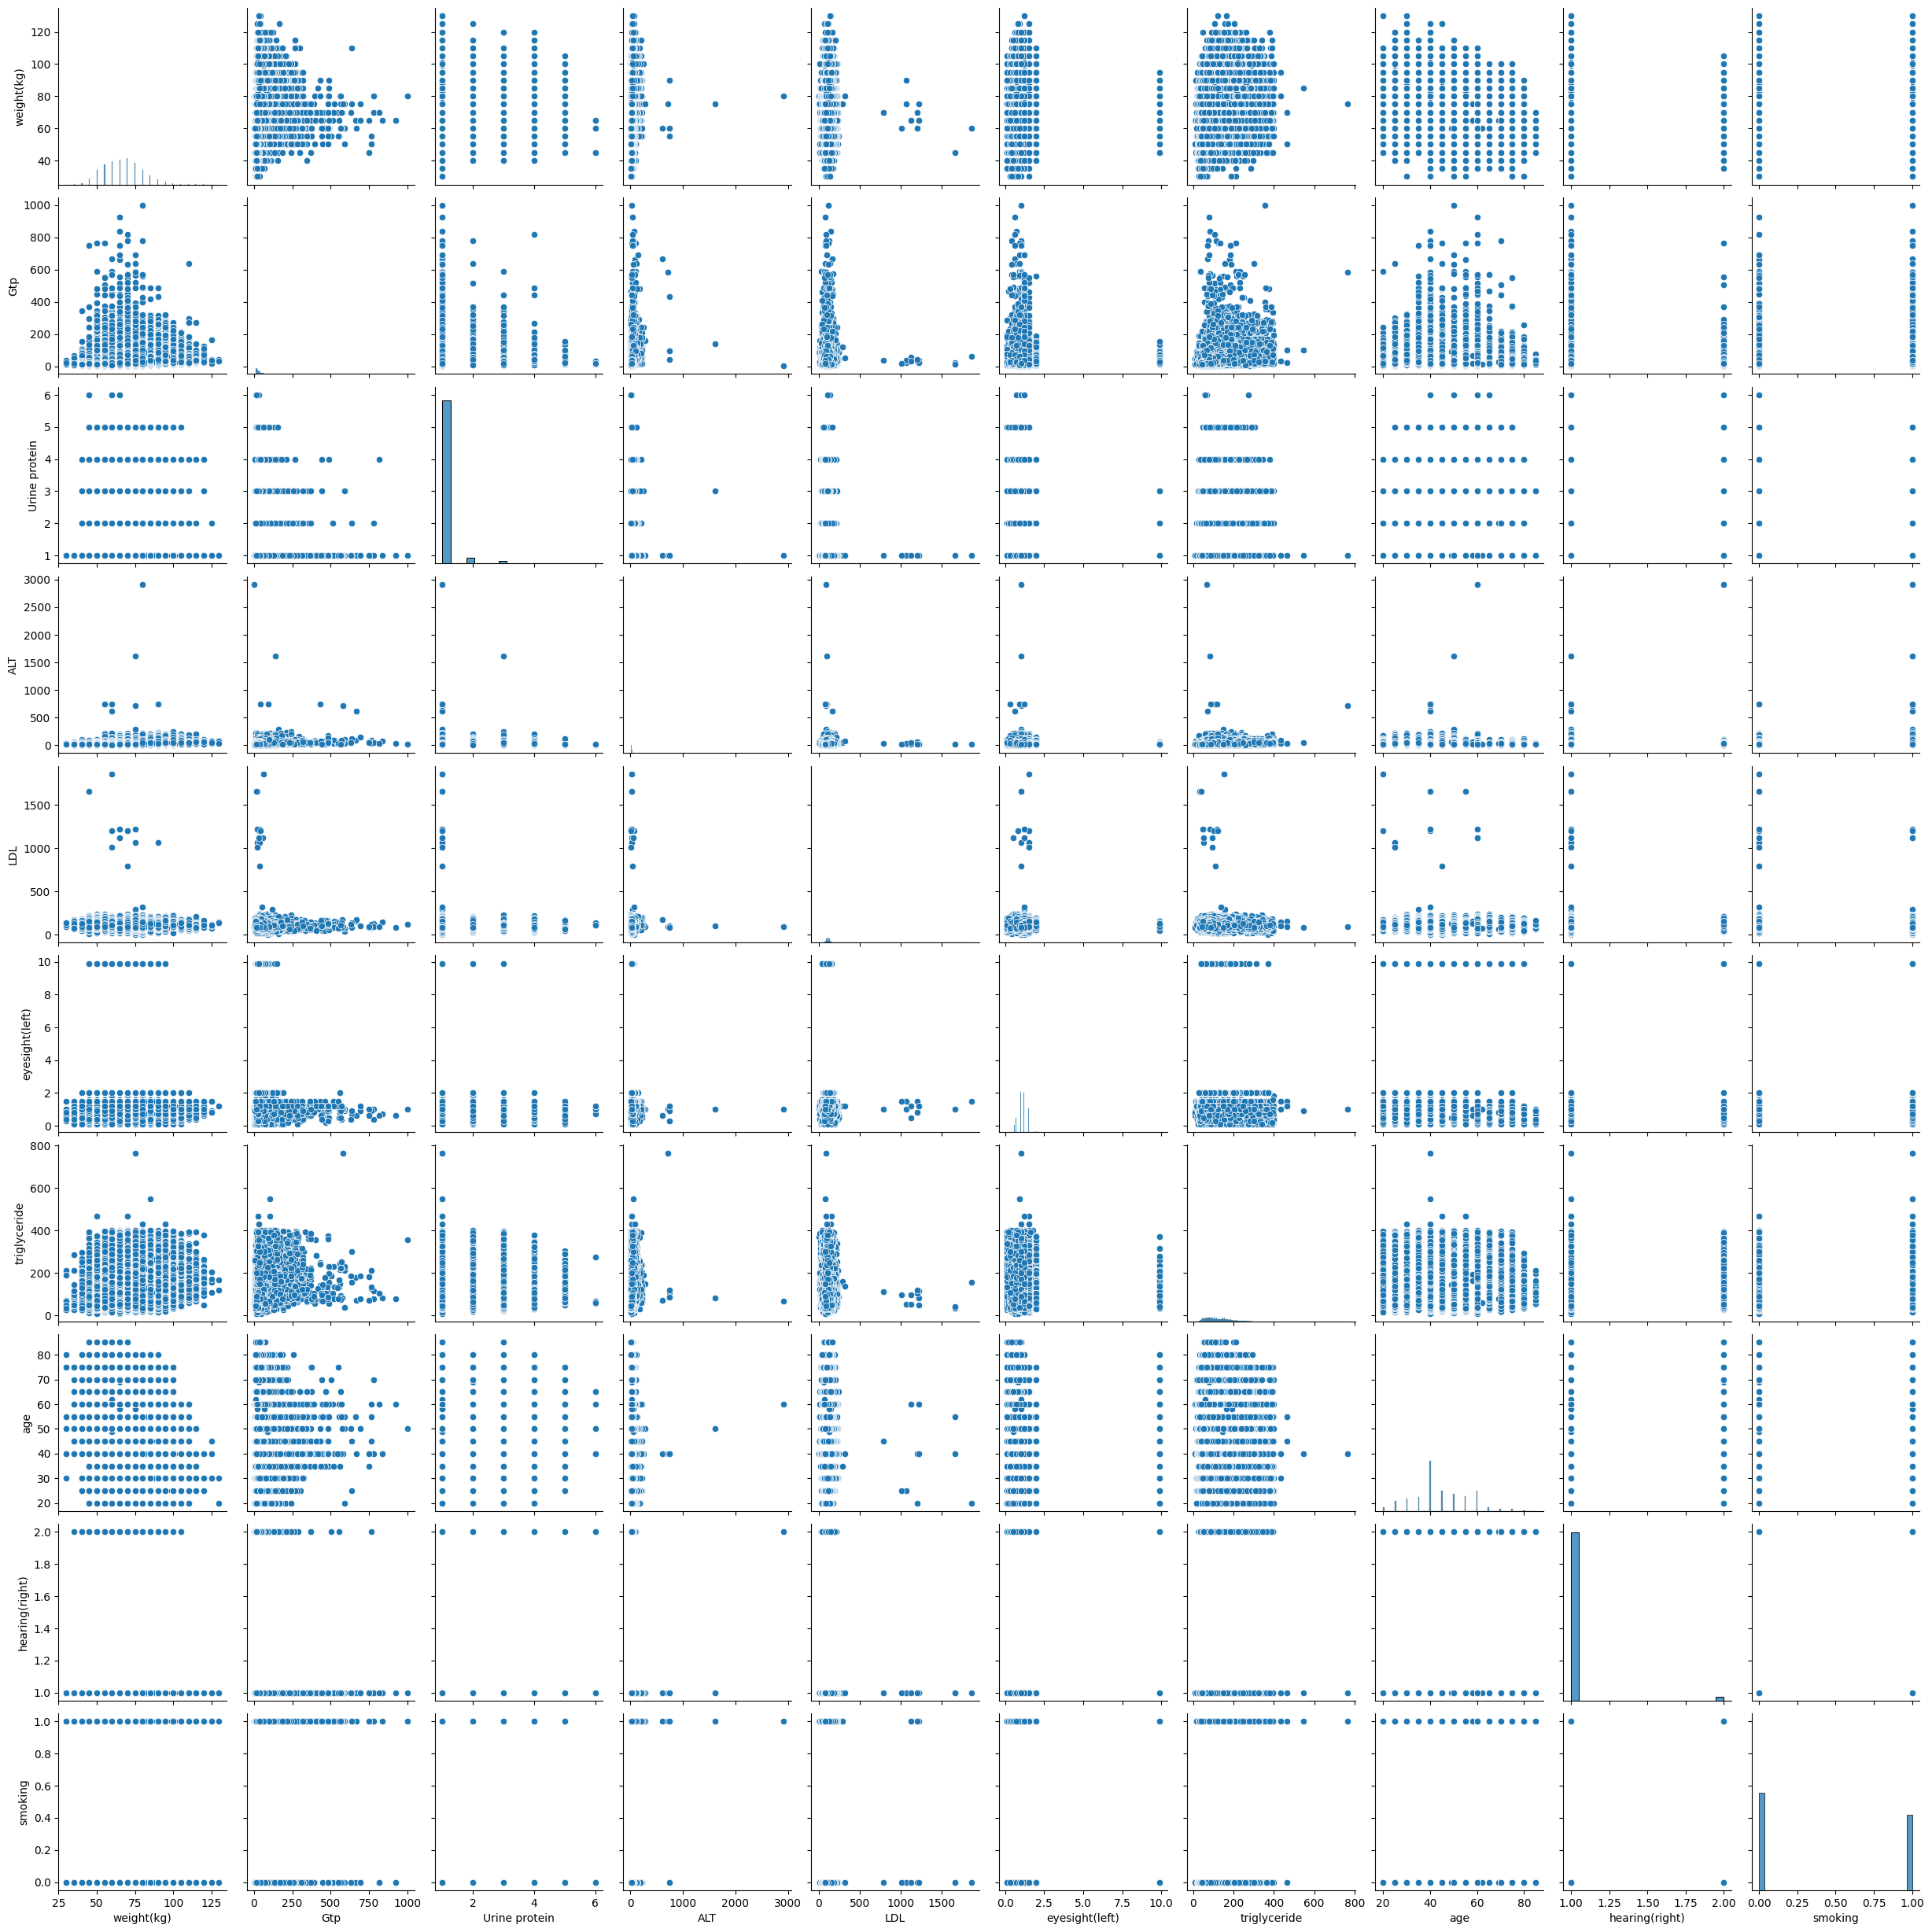

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df) #shows that the data ias normalized
plt.show()

Categorial Vs Numerical Features:

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   weight(kg)      159256 non-null  int64  
 1   Gtp             159256 non-null  int64  
 2   Urine protein   159256 non-null  int64  
 3   ALT             159256 non-null  int64  
 4   LDL             159256 non-null  int64  
 5   eyesight(left)  159256 non-null  float64
 6   triglyceride    159256 non-null  int64  
 7   age             159256 non-null  int64  
 8   hearing(right)  159256 non-null  int64  
 9   smoking         159256 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 12.2 MB


checking for missing values

In [ ]:

print(df.isnull().sum())

weight(kg)        0
Gtp               0
Urine protein     0
ALT               0
LDL               0
eyesight(left)    0
triglyceride      0
age               0
hearing(right)    0
smoking           0
dtype: int64


In [ ]:
#2.checking for duplicates
print(df.duplicated().sum())
df.shape

15


(159256, 10)

In [ ]:
categorical = []
numerical = []
smoking = df['smoking']
temp = df.drop(columns=['smoking'])
for column in temp.columns:
    if df[column].nunique() > 10 :
        numerical.append(column)
    else:
        categorical.append(column)

In [ ]:
categorical

['Urine protein', 'hearing(right)']

In [ ]:
numerical

['weight(kg)', 'Gtp', 'ALT', 'LDL', 'eyesight(left)', 'triglyceride', 'age']

**Univariate Analysis:**
1. Numerical Features:
we used histograms from the seaborn library
2. Categorical Fetaures:
we used barplots from the pandas library
3. Boxplots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

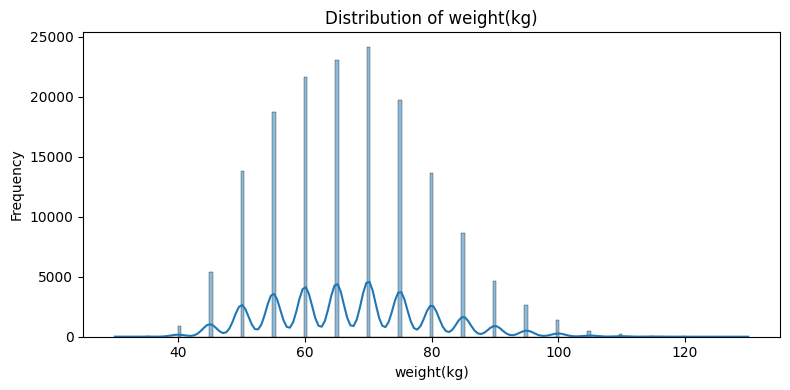

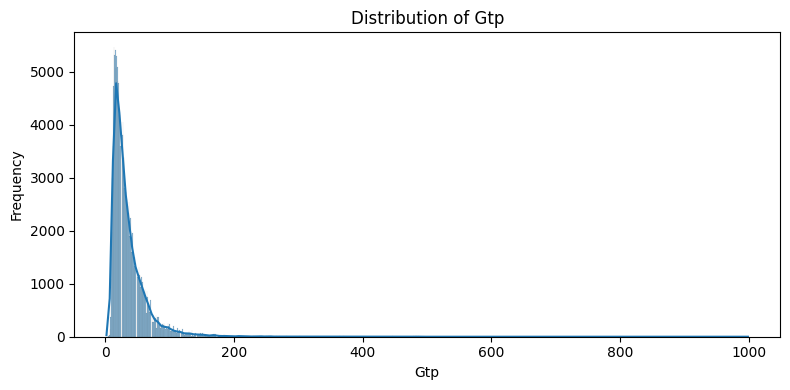

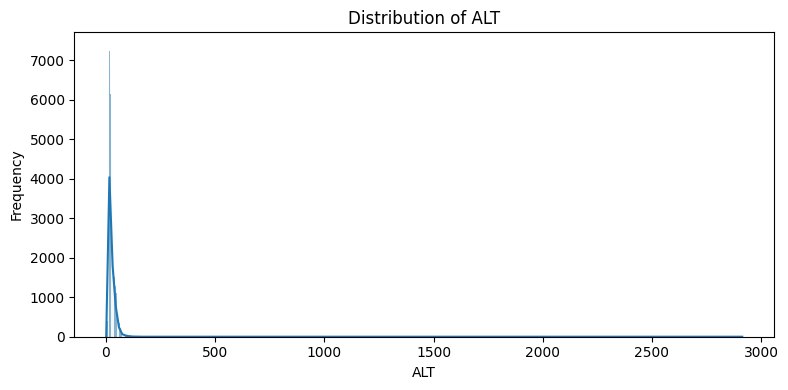

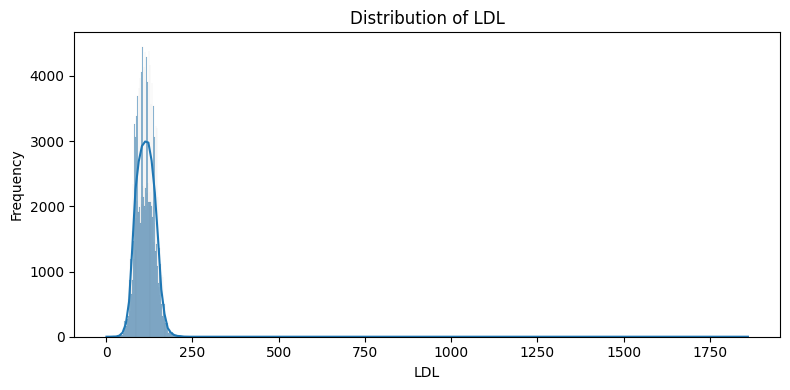

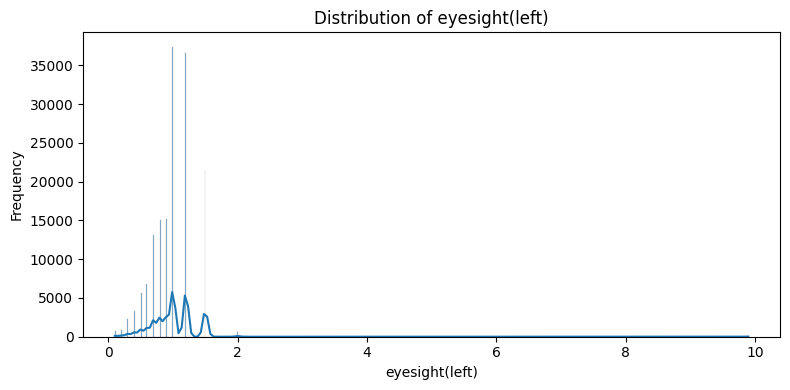

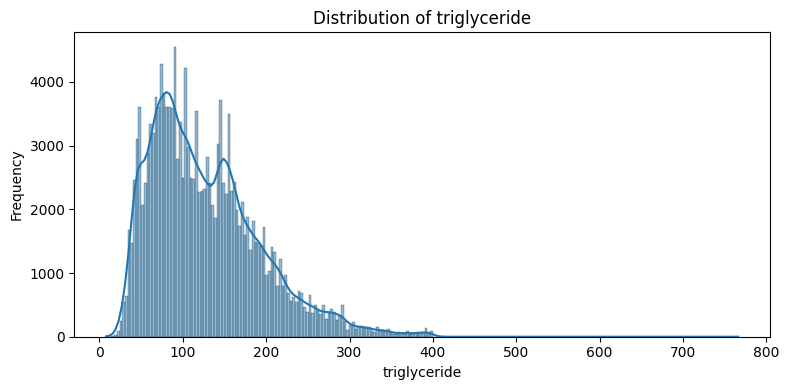

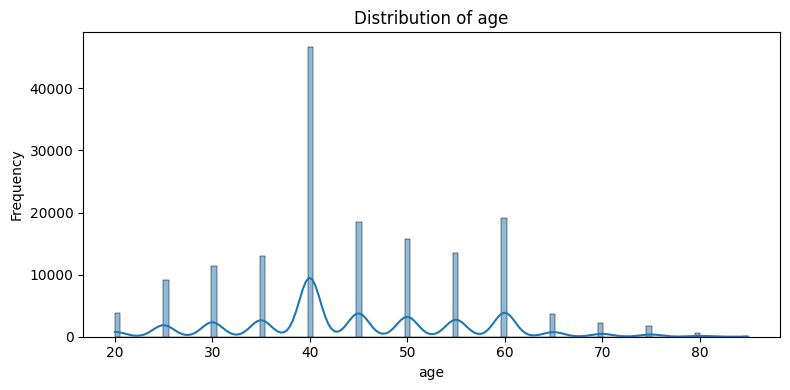

In [ ]:
#histograms -> for all numerical features
for column in df.columns:
    if (column in categorical) or (column == 'smoking'):
        continue
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
   # plt.show()
    plt.tight_layout()

# **Notes**
* The GTP , ATP, LDL values are heavily right-skewed , will need some preprocessing before we do any further analysis
*   Triglyceride Distribution
Shape: The distribution of triglyceride is right-skewed (positively skewed)
***Concentration***:
Most of the values are concentrated in the range 0-200.
There is a long tail extending toward higher values, up to around 700.
* The age distribution is bimodal or multimodal. There are noticeable peaks at regular intervals. This suggests that the data might have been collected every 10 years.



Calculating the skewness using skew() in pandas:

In [ ]:
for column in df.columns:
    if (column in categorical) or (column == 'smoking'):
        continue
    print(column + ":" )
    print(df[column].skew())

weight(kg):
0.37807475043098937
Gtp:
5.414827255969211
ALT:
34.8300119320999
LDL:
6.8748102130205035
eyesight(left):
8.890572430701148
triglyceride:
0.986227749457496
age:
0.2916973461458878


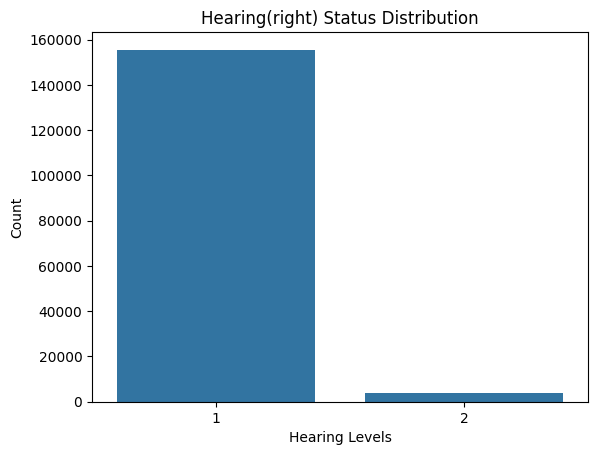

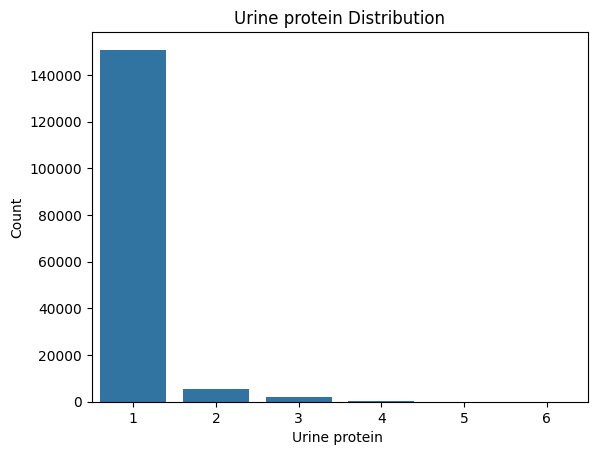

In [ ]:
#Plot ->the categorical columns
sns.countplot(x='hearing(right)', data=df)
plt.title('Hearing(right) Status Distribution')
plt.xlabel('Hearing Levels')
plt.ylabel('Count')
plt.show()
sns.countplot(x='Urine protein', data=df)
plt.title('Urine protein Distribution')
plt.xlabel('Urine protein ')
plt.ylabel('Count')
plt.show()

**Hearing (Right)** The significant skew towards one category (1.0) suggests a class imbalance.
Imbalance should be addressed in machine learning models (e.g., resampling strategies ).

**Urine Protein**:Most observations fall in the first category (likely indicating normal levels).
A small number of values appear in the subsequent categories.

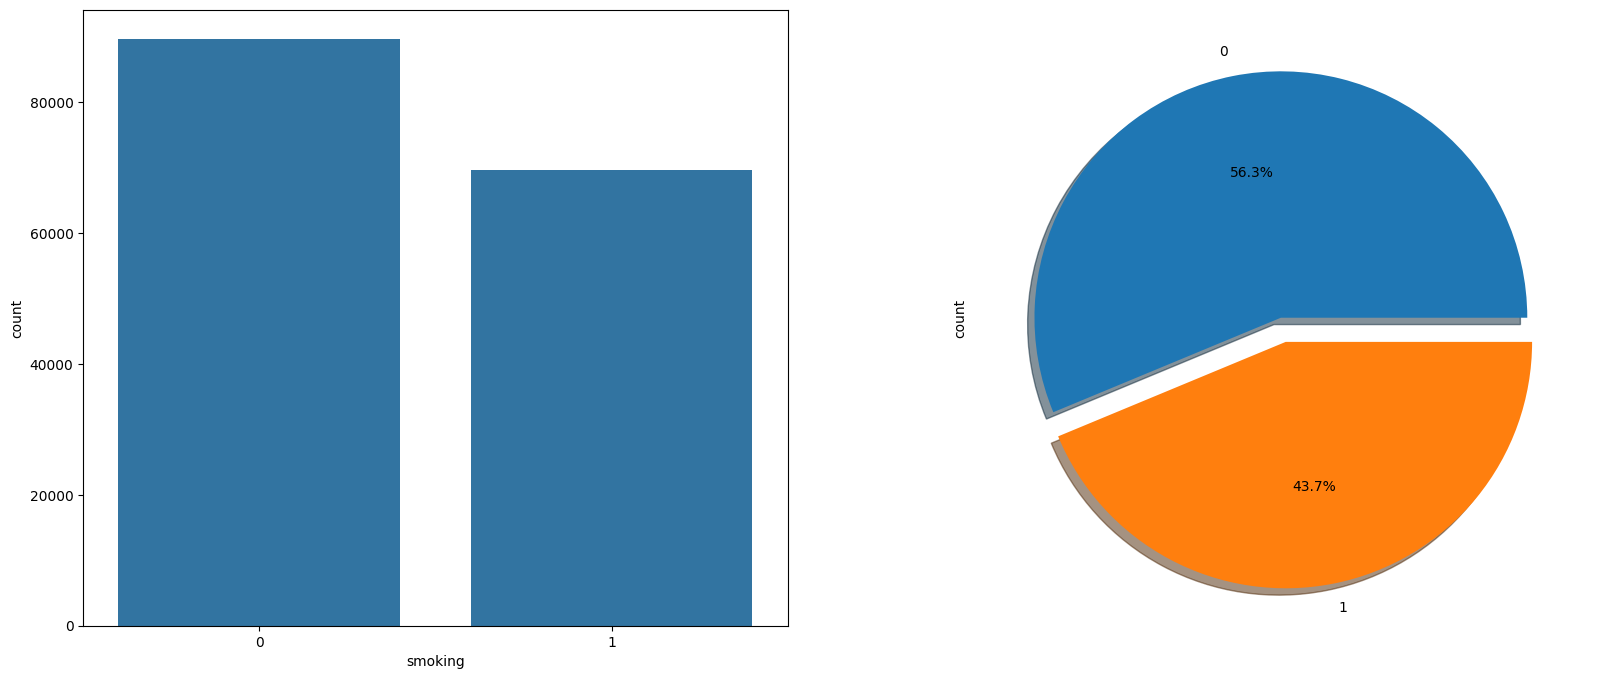

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=df, x="smoking", ax=ax[0])
df["smoking"].value_counts().plot.pie(ax=ax[1], shadow=True, explode=[0, 0.1], autopct="%1.1f%%")

plt.show()

# **Boxplots**:
They help in identifying the outliers

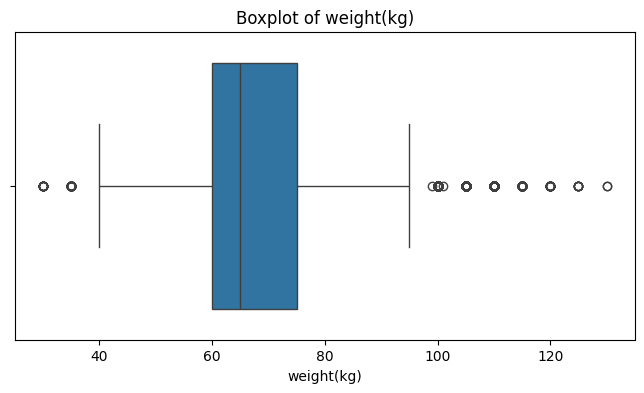

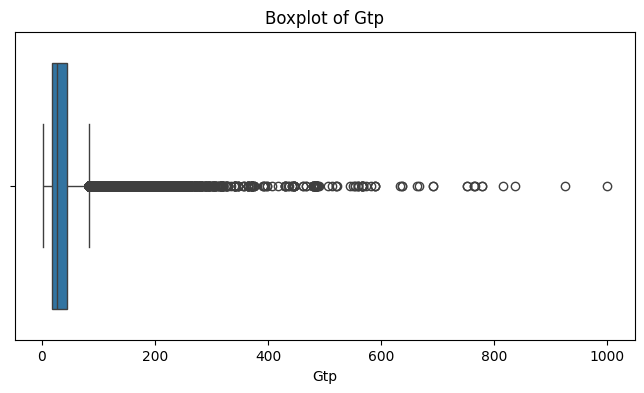

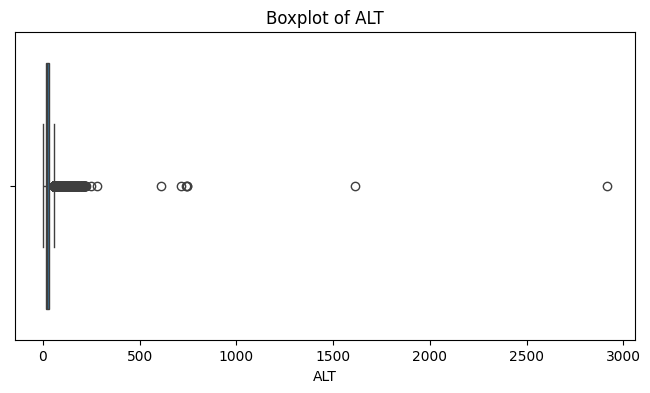

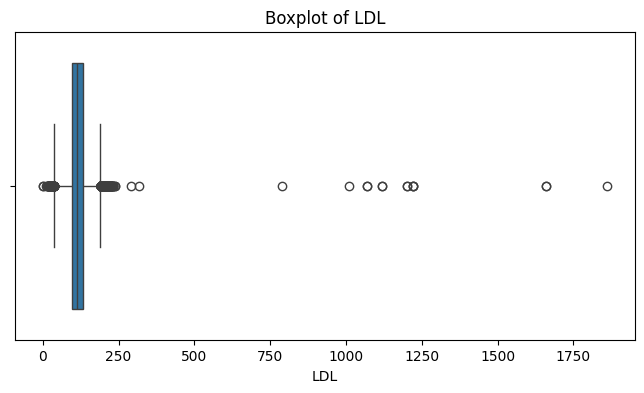

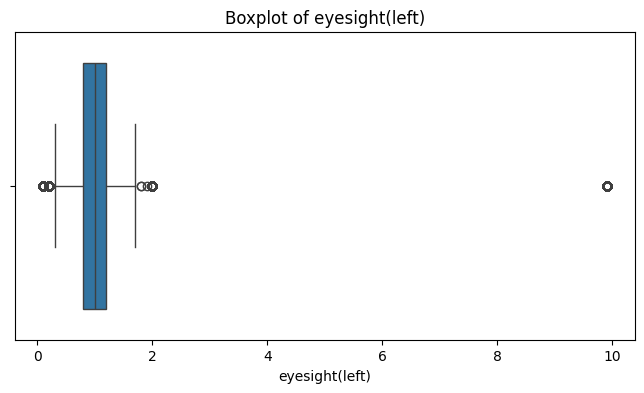

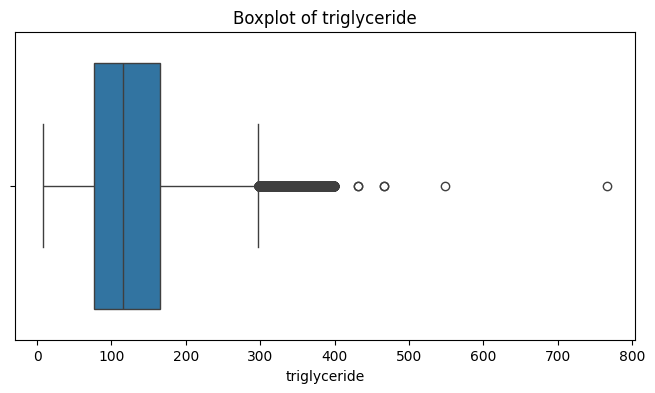

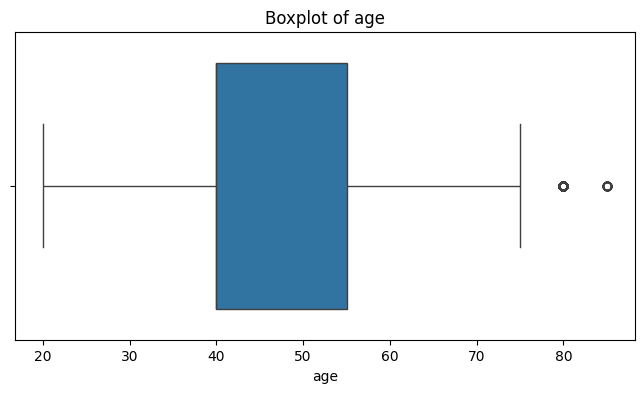

In [ ]:
for column in df.columns:
    if (column in categorical) or (column == 'smoking'):
        continue
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

**Bivariate Analysis:**

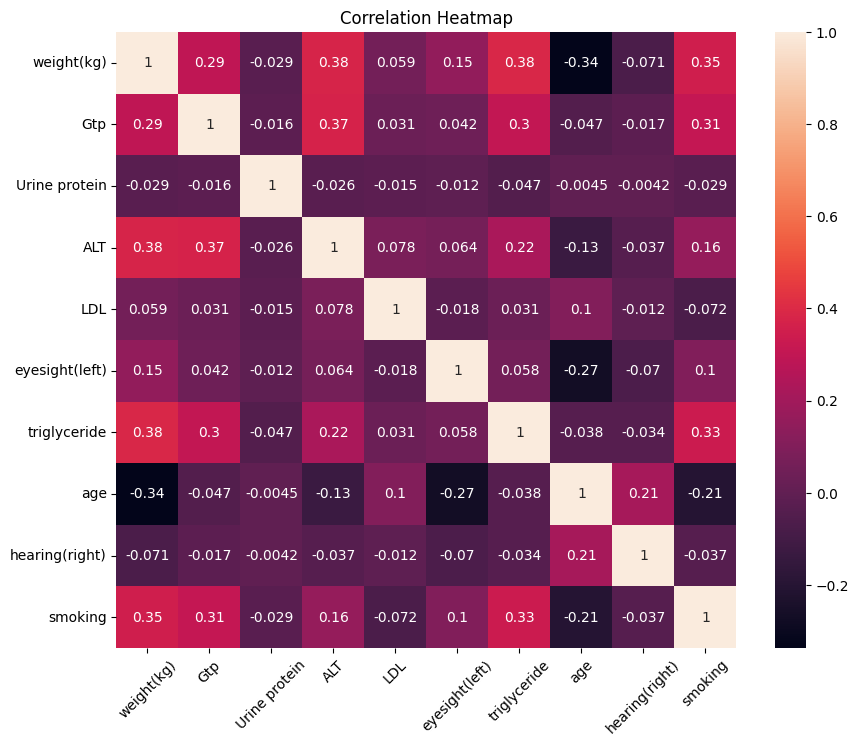

In [ ]:
#correlation map:
#1 -> strongly correlated
#-1 -> strongly not correlated
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

Correlation map analysis:
From this correlation map we can analyse that:
1. weight , Gtp , ALT , eyesight(left) , triglyceride correlate positively with the target
2. Urine protein, LDL , age , hearing(right) correlate negatively with the target

Smoking has moderate positive correlations with:
1. Weight (0.35): Smokers may tend to have a slightly higher weight.
2. Triglyceride (0.34): Indicates smokers may have higher triglyceride levels.
3. Gtp (0.41): Gtp shows a notable correlation with smoking.

Feature-Feature Correlations:

1. ALT and Triglyceride (0.33): Suggests a moderate relationship, possibly indicating similar health indicators.
2. Age and Weight (-0.34): Older individuals in the dataset may weigh less.
3. Eyesight (left) and Age (-0.34): Older individuals might have poorer eyesight.
4. Hearing (right) and Age (0.21): Indicates a slight positive relationship between age and hearing ability.

# **Scatterplots** of features against smoking

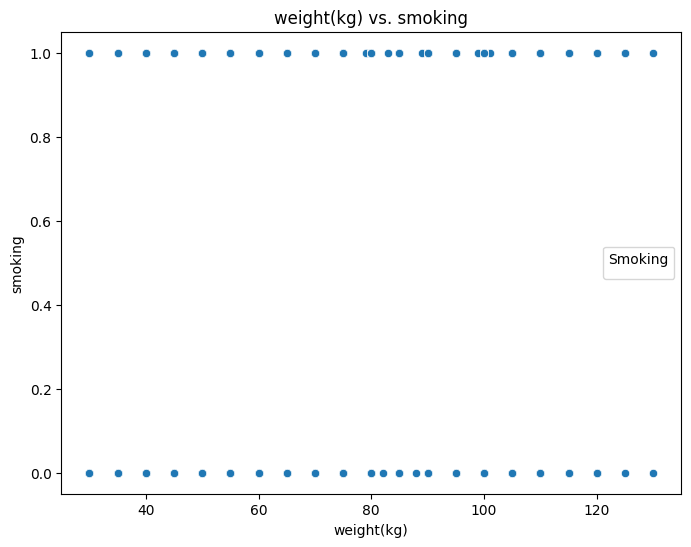

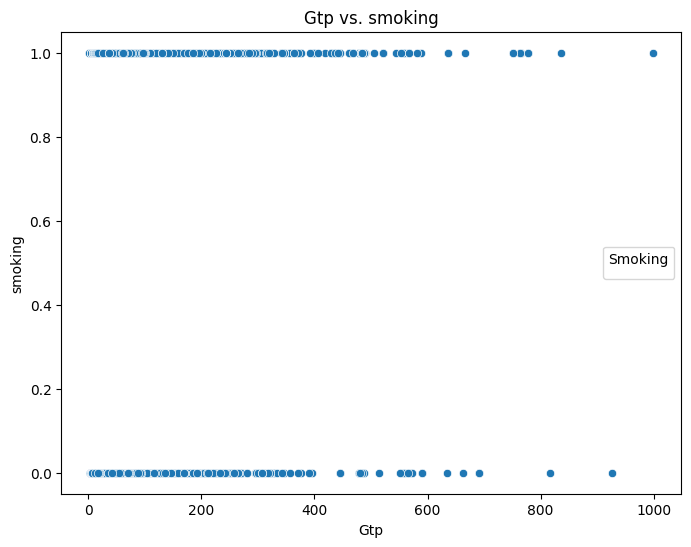

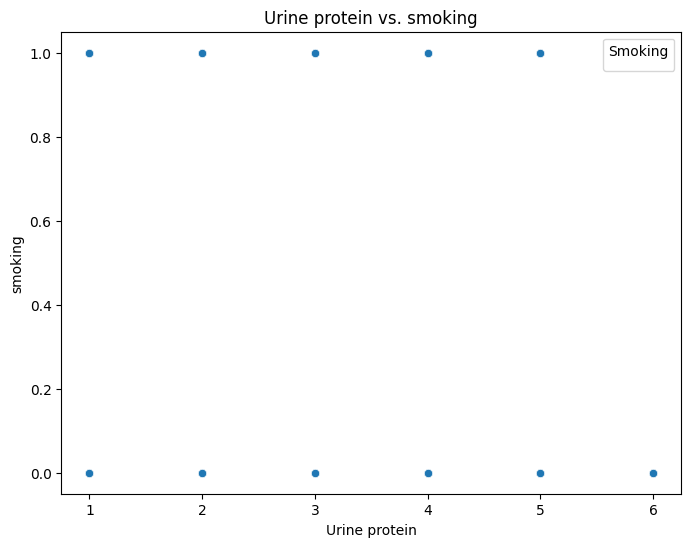

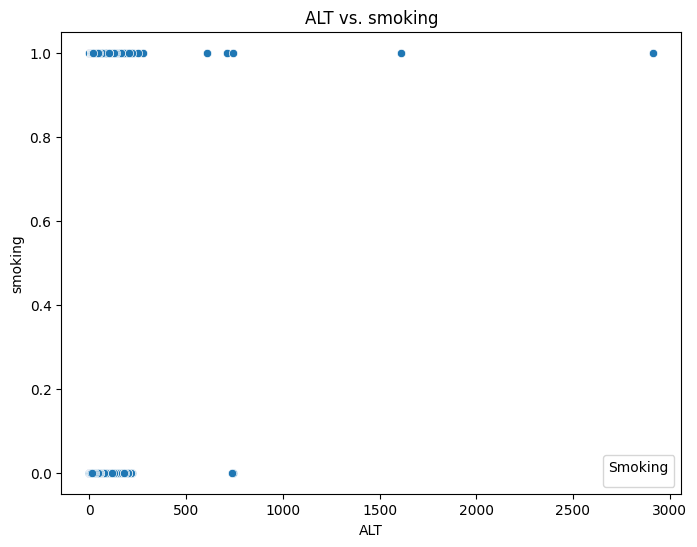

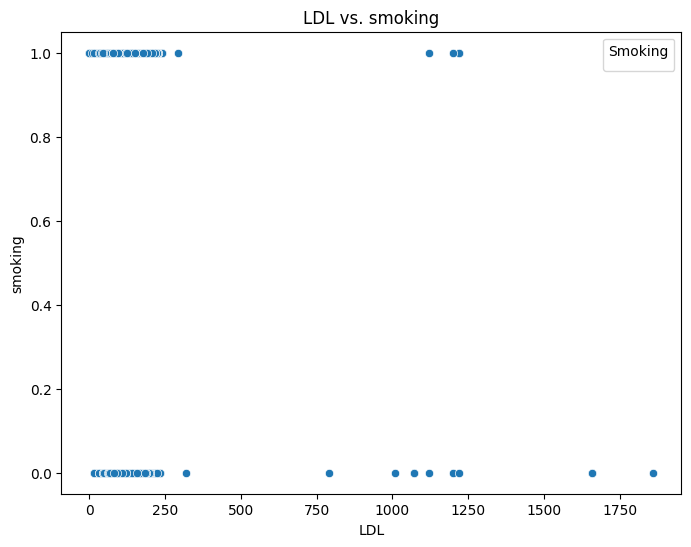

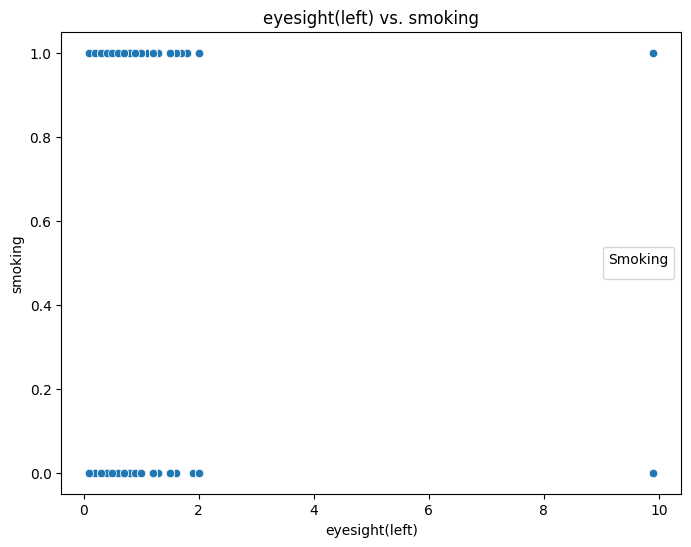

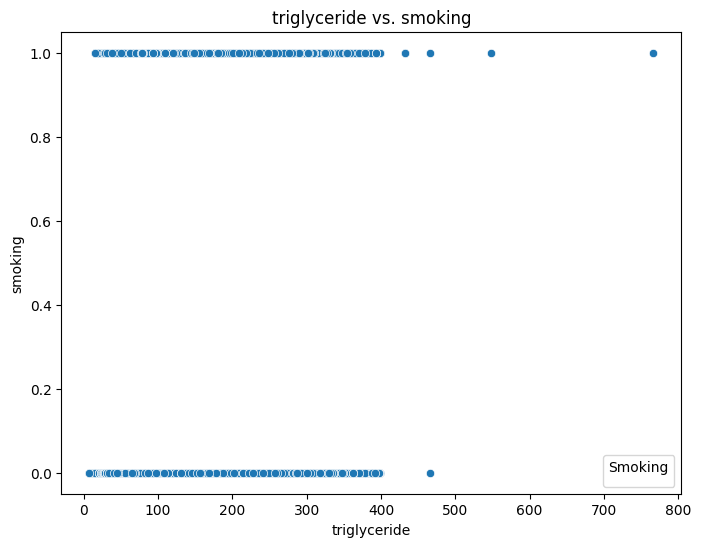

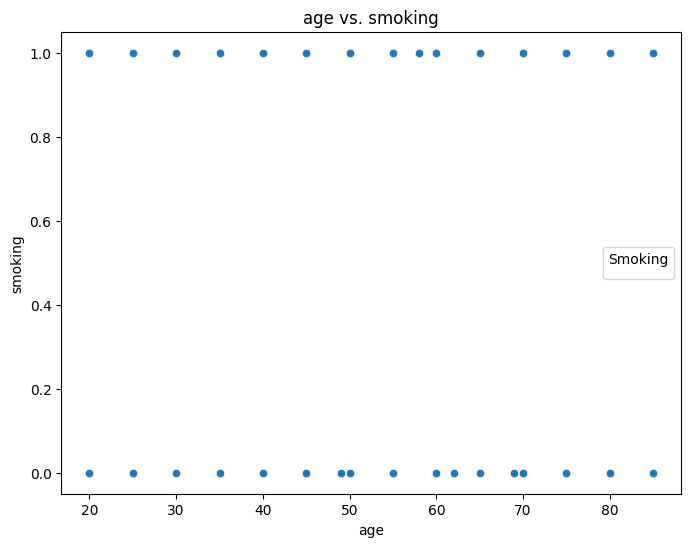

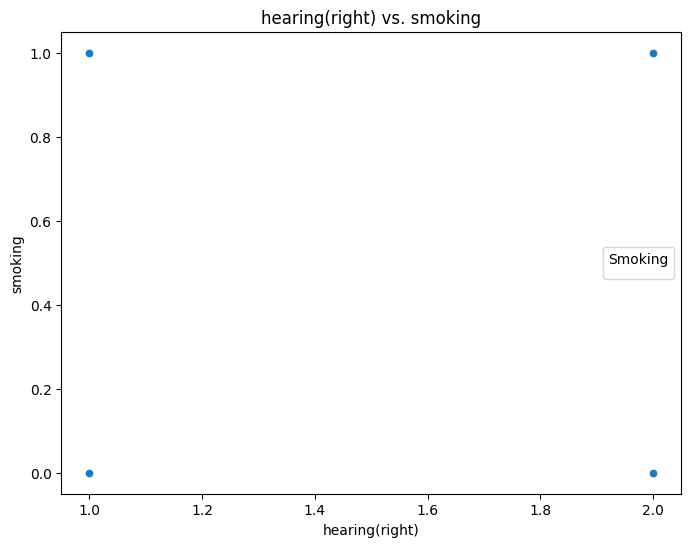

In [ ]:
features = [
    'weight(kg)', 'Gtp', 'Urine protein', 'ALT', 'LDL',
    'eyesight(left)', 'triglyceride', 'age', 'hearing(right)'
]
y_feature = 'smoking'
for x_feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_feature, y=y_feature, data=df)
    plt.title(f'{x_feature} vs. {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(title='Smoking')
    plt.show()

# ***Observations:***
1. Most smokers weigh in range 80kg to 100kg
2. Smokers have GTP upto 600 while non smokers only upto 400
3. Smoking has no effect on urine protein
4. Smokers have slightly higher ALT
5. Smokers have higher LDL
6. Eyesight(left) is the same in both
7. Triglyceride same in both
8. More smokers age around 60-70
9. Hearing (right) same in both


Numerical features against the target:

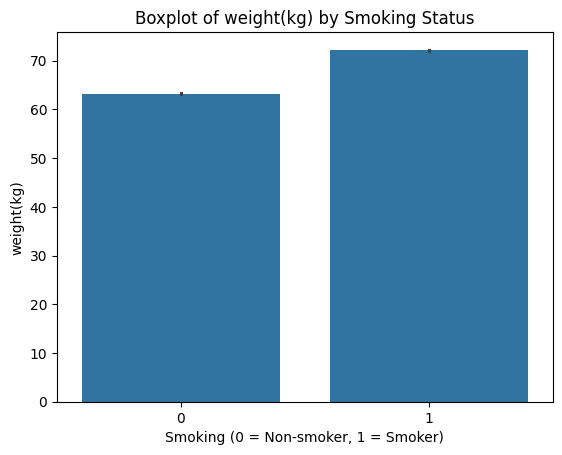

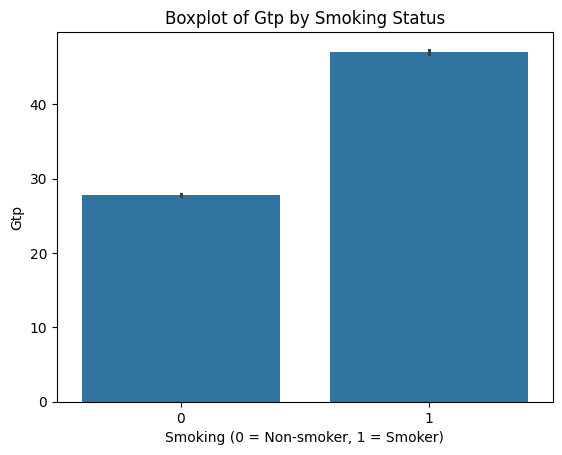

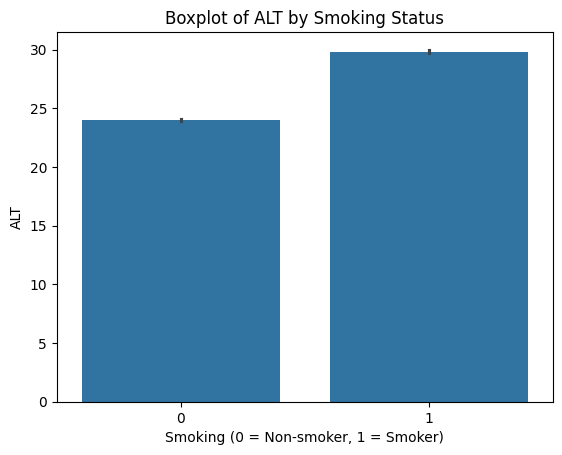

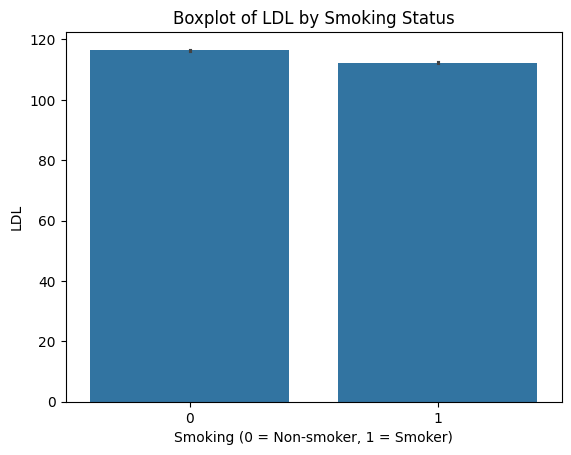

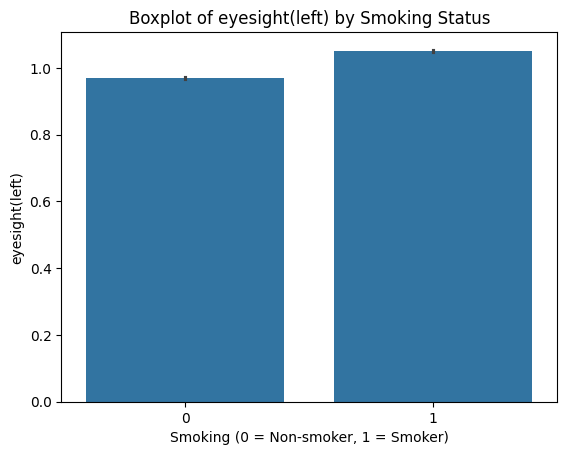

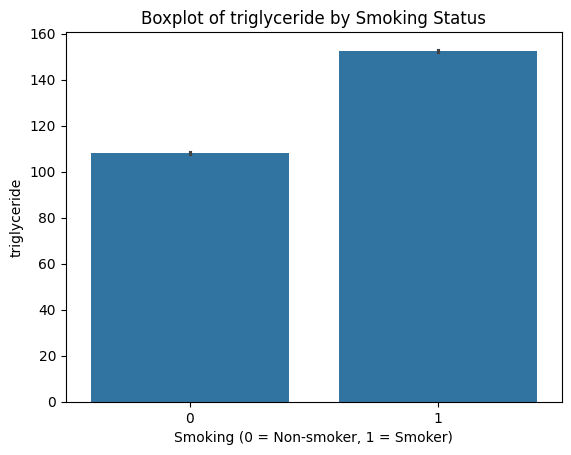

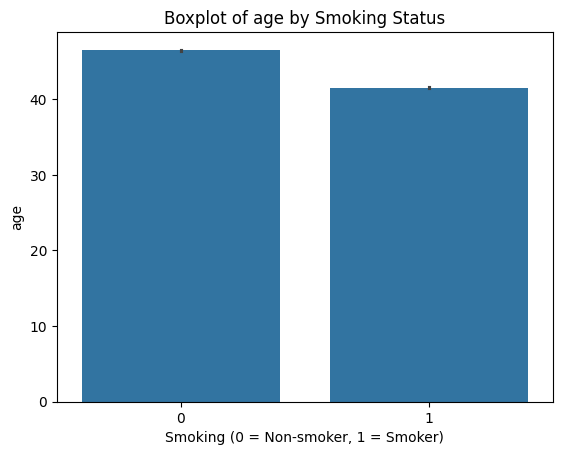

In [ ]:
for num in numerical:
    sns.barplot(x='smoking', y=num, data=df)
    plt.xlabel('Smoking (0 = Non-smoker, 1 = Smoker)')
    plt.ylabel(num)
    plt.title(f'Boxplot of {num} by Smoking Status')
    plt.show()

**Multivariate:**

Strongly correlated features plotted with smoking

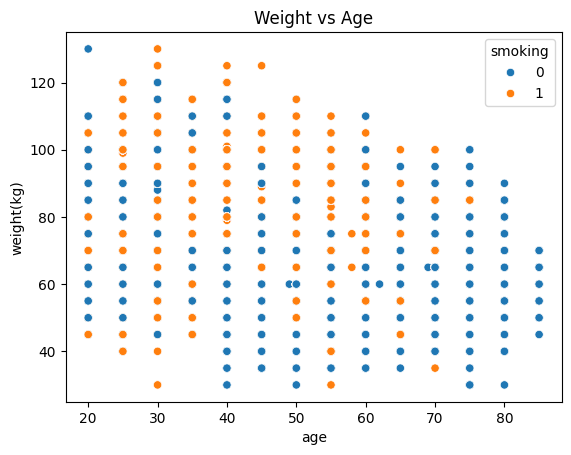

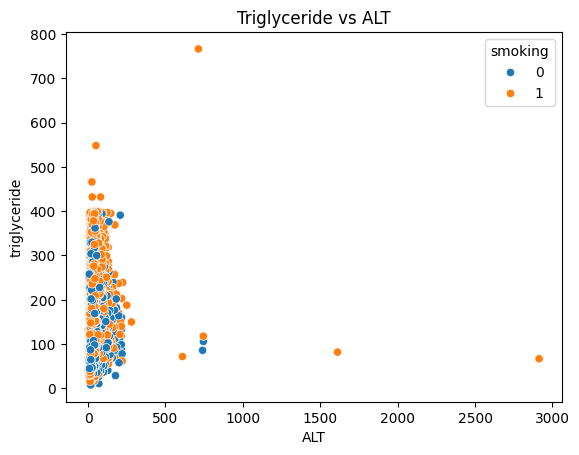

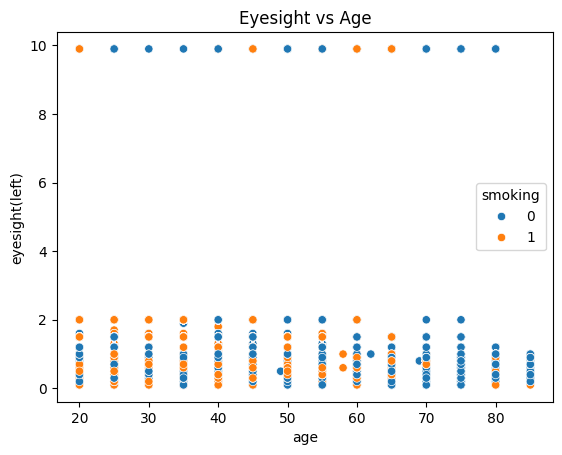

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Weight vs Age
sns.scatterplot(data=df, x="age", y="weight(kg)", hue="smoking")
plt.title("Weight vs Age")
plt.show()

# Triglyceride vs ALT
sns.scatterplot(data=df, x="ALT", y="triglyceride", hue="smoking")
plt.title("Triglyceride vs ALT")
plt.show()

# Eyesight vs Age
sns.scatterplot(data=df, x="age", y="eyesight(left)", hue="smoking")
plt.title("Eyesight vs Age")
plt.show()

**Observations**:
1.   Smokers tend to age around 20-30 and weigh 60-100

## **Feature Engineering:**
1. Feature Transformation
2. Feature Construction
3. Feature Selection
4. Feature Extraction

**1) Feature Transformation**

*   Check null values--> no  null values
*   Check duplicated values ---> drop
*   Check outliers --->
      * Calculate % take high %
      * See skewness
      * Use Log1p to decrease %
      * Trim eyesight by IQR
*  Feature Scaling: Standardization due to Gaussian distribution


In [ ]:
#1.checking for missing values
print(df.isnull().sum())

weight(kg)        0
Gtp               0
Urine protein     0
ALT               0
LDL               0
eyesight(left)    0
triglyceride      0
age               0
hearing(right)    0
smoking           0
dtype: int64


In [ ]:
#2.checking for duplicates
print(df.duplicated().sum())
df.shape

15


(159256, 10)

In [ ]:
#dropping duplicates
df.drop_duplicates(inplace=True)
df.shape

(159241, 10)

Handling Outliers:

In [ ]:
#function that calculates the percentage of outliers for each feature
def calculate_outliers_iqr(data):
    outliers_percentage = {}

    for column in data.select_dtypes(include=[float, int]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
        outliers_percentage[column] = (outliers.sum() / len(data)) * 100

    return outliers_percentage

In [ ]:
outliers_iqr = calculate_outliers_iqr(df)
print("Outliers Percentage (IQR):")
print(outliers_iqr)

Outliers Percentage (IQR):
{'weight(kg)': 1.4418397272059331, 'Gtp': 5.5205631715450165, 'Urine protein': 5.270627539389981, 'ALT': 4.236346167130325, 'LDL': 0.3108495927556345, 'eyesight(left)': 1.4594231385133227, 'triglyceride': 1.9373151386891565, 'age': 0.4282816611299854, 'hearing(right)': 2.3423615777343776, 'smoking': 0.0}


In [ ]:
#fn to print boxplots for datase
def plot_boxplots(data):
  for column in data.columns:
    if (column in categorical) or (column == 'smoking'):
        continue
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
from scipy import stats
import numpy as np
df = df[np.abs(stats.zscore(df) < 3).all(axis=1)]
df

,weight(kg),Gtp,Urine protein,ALT,LDL,eyesight(left),triglyceride,age,hearing(right),smoking
0,60,27,1,25,75,0.5,300,55,1,1
2,75,53,1,31,93,0.4,197,20,1,1
3,95,30,1,27,102,1.5,203,35,1,0
4,60,17,1,13,93,1.5,87,30,1,1
6,55,16,1,12,122,1.5,153,45,1,0
...,...,...,...,...,...,...,...,...,...,...
159251,45,13,1,26,159,1.5,47,40,1,0
159252,75,18,1,20,108,1.0,202,50,1,0
159253,50,12,1,9,93,1.5,45,40,1,0
159254,75,37,1,17,80,1.2,148,50,1,1


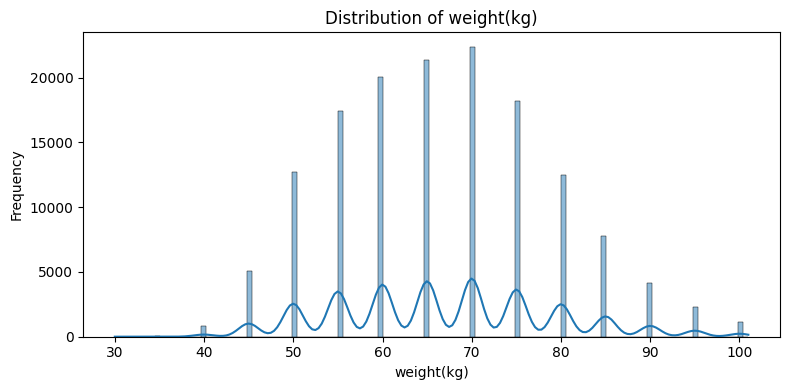

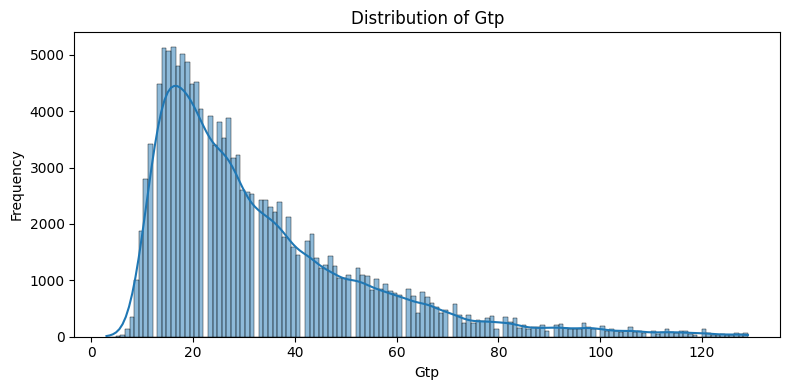

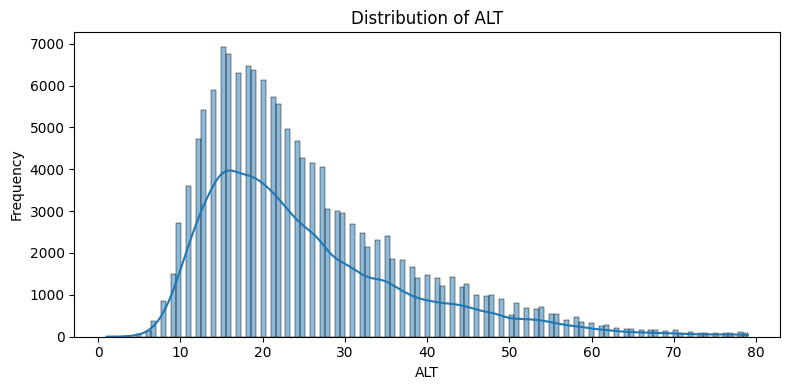

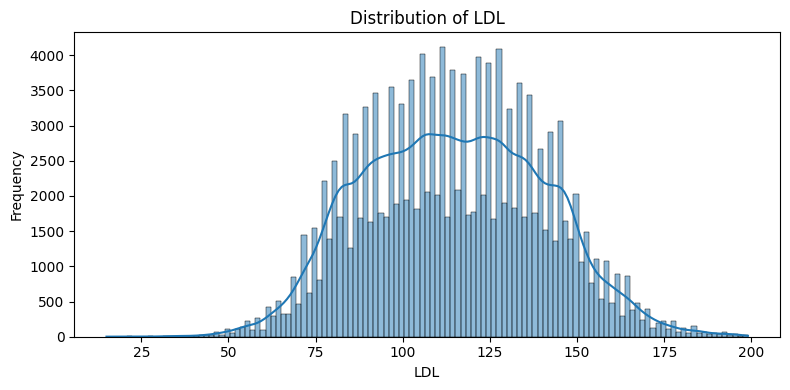

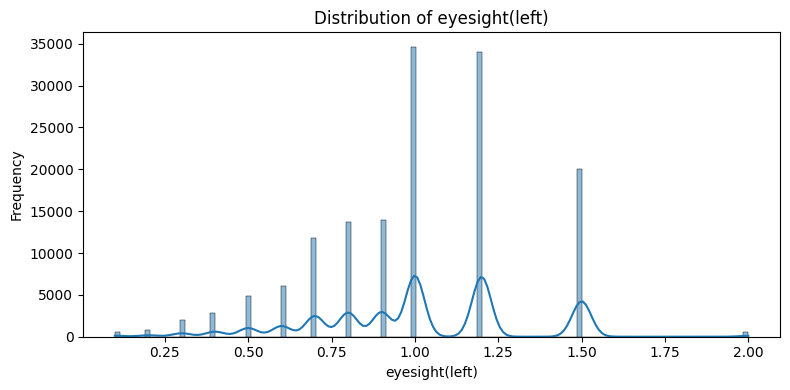

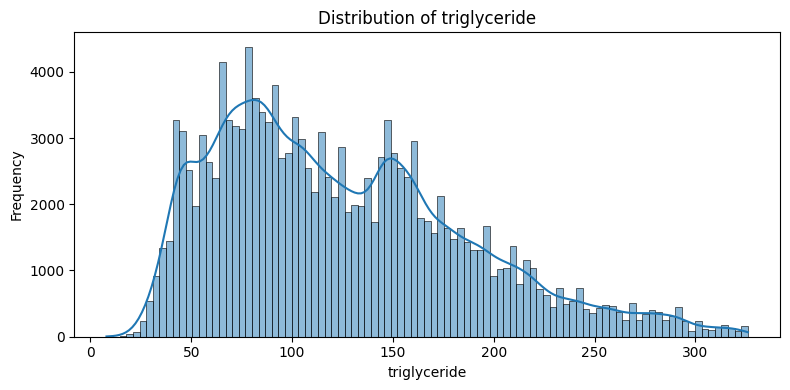

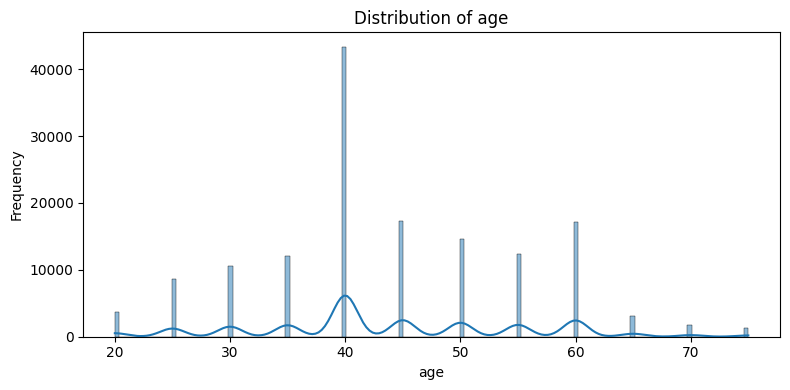

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#histograms -> for all numerical features
for column in df.columns:
    if (column in categorical) or (column == 'smoking'):
        continue
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
   # plt.show()
    plt.tight_layout()

Dropping eyesight & hearing:

In [ ]:
df.drop(columns=['eyesight(left)','hearing(right)'], inplace=True)
df.head()

<ipython-input-14-25dadbe3aa40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['eyesight(left)','hearing(right)'], inplace=True)


,weight(kg),Gtp,Urine protein,ALT,LDL,triglyceride,age,smoking
0,60,27,1,25,75,300,55,1
2,75,53,1,31,93,197,20,1
3,95,30,1,27,102,203,35,0
4,60,17,1,13,93,87,30,1
6,55,16,1,12,122,153,45,0


Data Standaradization:

In [ ]:
df = df.reset_index(drop=True)
df.shape

(145927, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the target column
target_column = 'smoking'

# Separate the target column from the features
X = df.drop(columns=[target_column])  # Features (without the target)
y = df[target_column]  # Target column

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features (X) without affecting the target
X_scaled = scaler.fit_transform(X)

# Convert the standardized features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the target column back to the standardized features
df = pd.concat([X_scaled_df, y], axis=1)

# Display the first few rows of the standardized dataset
print(df.head())


   weight(kg)       Gtp  Urine protein       ALT       LDL  triglyceride  \
0   -0.558664 -0.292804       -0.19582 -0.034935 -1.532622      2.833152   
1    0.673556  0.940551       -0.19582  0.436966 -0.836410      1.169413   
2    2.316517 -0.150494       -0.19582  0.122365 -0.488304      1.266330   
3   -0.558664 -0.767172       -0.19582 -0.978738 -0.836410     -0.607395   
4   -0.969404 -0.814609       -0.19582 -1.057388  0.285265      0.458690   

        age  smoking  
0  0.967575        1  
1 -2.084659        1  
2 -0.776559        0  
3 -1.212592        1  
4  0.095508        0  


In [ ]:
df.isnull().sum()

,0
weight(kg),0
Gtp,0
Urine protein,0
ALT,0
LDL,0
triglyceride,0
age,0
smoking,0


**2)Feature Construction**:

* Age group
* Triglyceride_LDL ratio
* ALT_gtp ratio
* Weight_Age intercation
* Sensory Intercation
* High_LDL
* High_ALT


Feature Construction:

In [ ]:
df.describe()

,weight(kg),Gtp,Urine protein,ALT,LDL,triglyceride,age,smoking
count,1.459270e+05,1.459270e+05,1.459270e+05,1.459270e+05,1.459270e+05,1.459270e+05,1.459270e+05,145927.000000
mean,-4.881339e-16,-1.513824e-16,5.557666e-16,2.351807e-17,2.537809e-16,-4.951941e-17,-5.460769e-17,0.430297
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.495119
min,-3.023105e+00,-1.431286e+00,-1.958201e-01,-1.922540e+00,-3.853329e+00,-1.883466e+00,-2.084659e+00,0.000000
25%,-5.586642e-01,-7.197351e-01,-1.958201e-01,-7.427871e-01,-7.590528e-01,-7.850759e-01,-3.405254e-01,0.000000
50%,-1.479241e-01,-2.928044e-01,-1.958201e-01,-2.708860e-01,-2.416227e-02,-1.874223e-01,-3.405254e-01,0.000000
75%,6.735561e-01,4.187466e-01,-1.958201e-01,5.156159e-01,7.494067e-01,6.202178e-01,5.315414e-01,1.000000
max,2.809405e+00,4.545743e+00,5.106729e+00,4.212175e+00,3.263506e+00,3.253124e+00,2.711708e+00,1.000000


In [ ]:
df['Triglyceride_Weight_Ratio'] = df['triglyceride'] / df['weight(kg)']
df['ALT_Gtp_Ratio'] = df['ALT'] / df['Gtp']
df['Weight_Age_Interaction'] = df['weight(kg)'] * df['age']
df['ALT_weight_Ratio'] = df['ALT'] * df['weight(kg)']
df.head()

,weight(kg),Gtp,Urine protein,ALT,LDL,triglyceride,age,smoking,age_group,Triglyceride_Weight_Ratio,ALT_Gtp_Ratio,Weight_Age_Interaction,ALT_weight_Ratio
0,-0.558664,-0.292804,-0.19582,-0.034935,-1.532622,2.833152,0.967575,1,NaN,-5.071296,0.119313,-0.540549,0.019517
1,0.673556,0.940551,-0.19582,0.436966,-0.836410,1.169413,-2.084659,1,NaN,1.736178,0.464585,-1.404135,0.294321
2,2.316517,-0.150494,-0.19582,0.122365,-0.488304,1.266330,-0.776559,0,NaN,0.546653,-0.813087,-1.798911,0.283460
3,-0.558664,-0.767172,-0.19582,-0.978738,-0.836410,-0.607395,-1.212592,1,NaN,1.087228,1.275774,0.677432,0.546786
4,-0.969404,-0.814609,-0.19582,-1.057388,0.285265,0.458690,0.095508,0,NaN,-0.473167,1.298032,-0.092586,1.025036


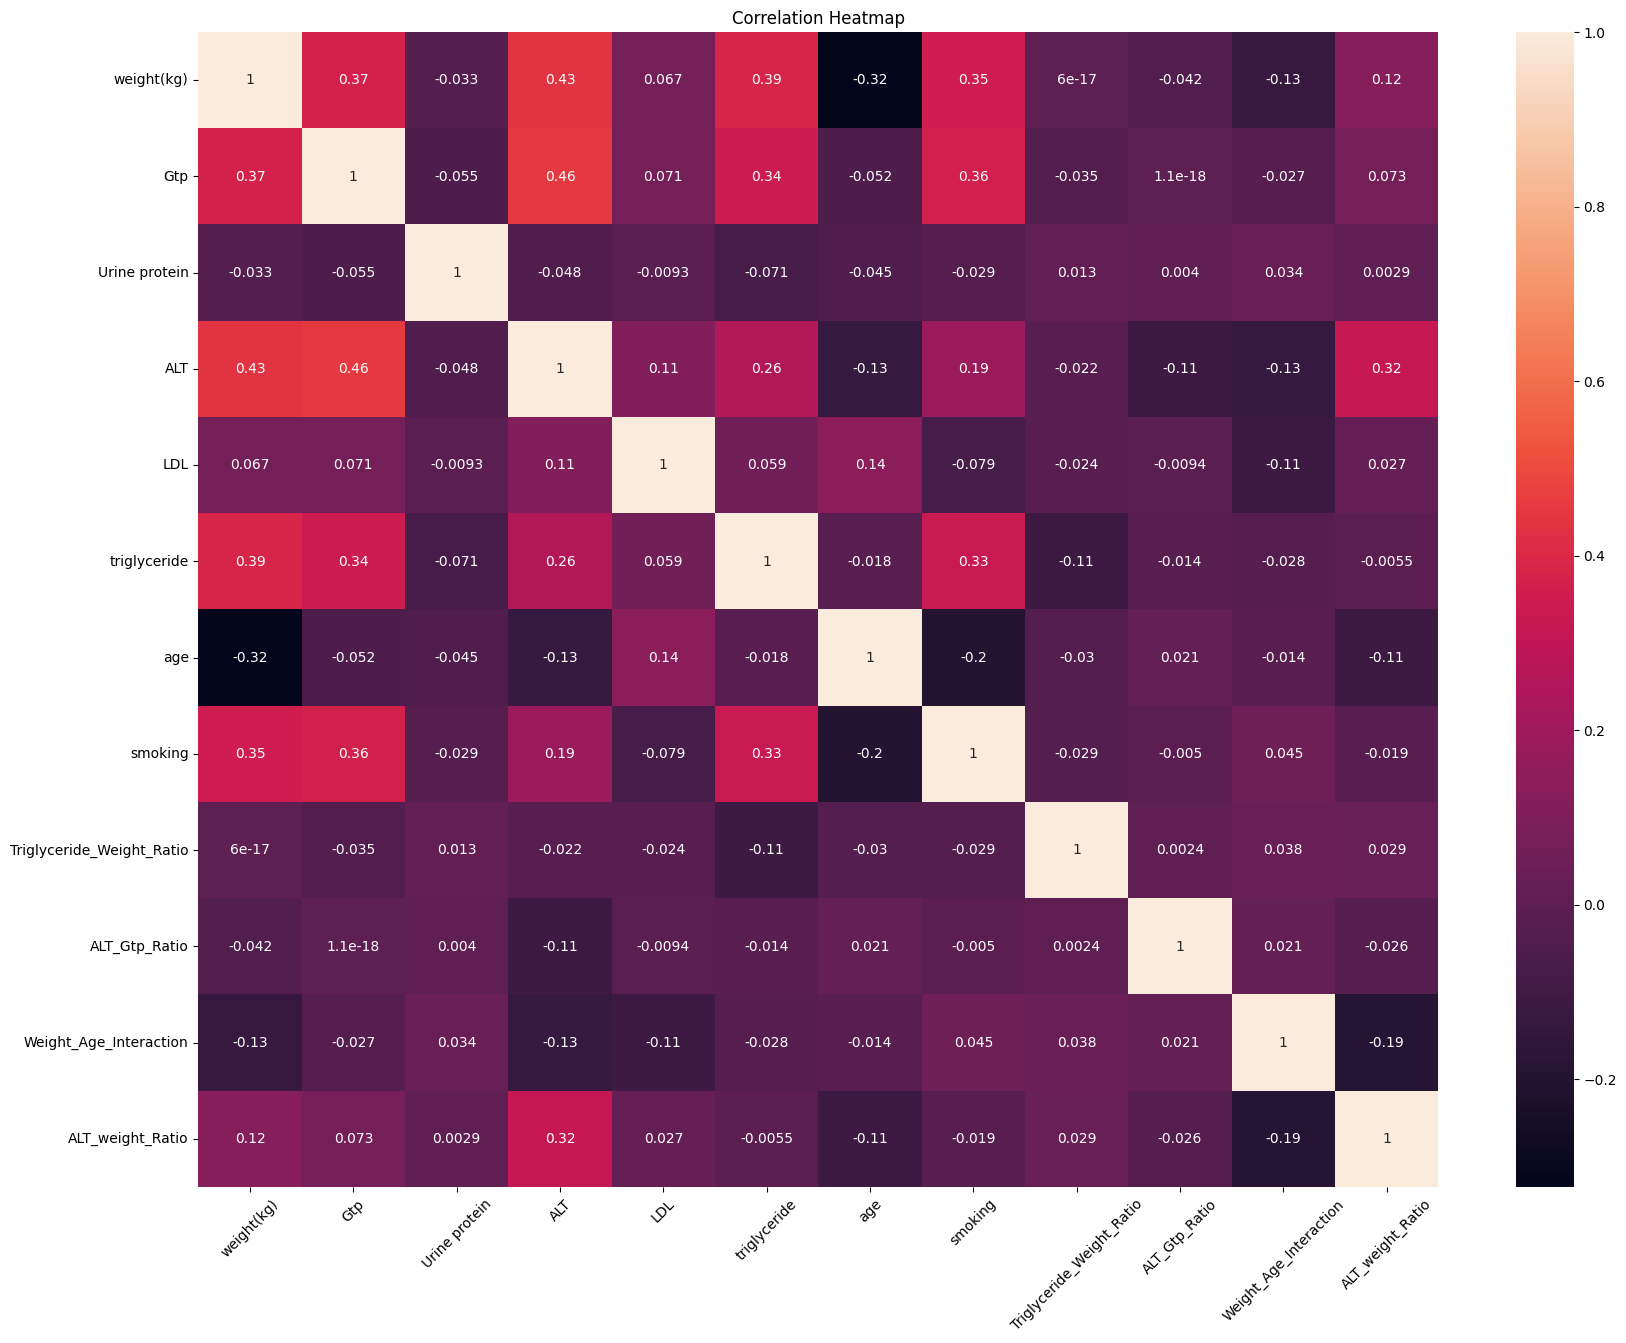

In [ ]:
#correlation map:
#1 -> strongly correlated
#-1 -> strongly not correlated
corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

In [ ]:
X = df.drop(columns=['smoking'],inplace=False)
y = df['smoking']
X,y

(        weight(kg)       Gtp  Urine protein       ALT       LDL  triglyceride  \
 0        -0.558664 -0.292804       -0.19582 -0.034935 -1.532622      2.833152   
 1         0.673556  0.940551       -0.19582  0.436966 -0.836410      1.169413   
 2         2.316517 -0.150494       -0.19582  0.122365 -0.488304      1.266330   
 3        -0.558664 -0.767172       -0.19582 -0.978738 -0.836410     -0.607395   
 4        -0.969404 -0.814609       -0.19582 -1.057388  0.285265      0.458690   
 ...            ...       ...            ...       ...       ...           ...   
 145922   -1.790885 -0.956919       -0.19582  0.043715  1.716368     -1.253507   
 145923    0.673556 -0.719735       -0.19582 -0.428186 -0.256233      1.250177   
 145924   -1.380144 -1.004356       -0.19582 -1.293338 -0.836410     -1.285813   
 145925    0.673556  0.181563       -0.19582 -0.664137 -1.339230      0.377926   
 145926   -1.790885 -0.767172       -0.19582 -0.742787 -1.300551     -0.607395   
 
              

**3)Feature Selection**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd



# Assuming 'X' contains features and 'y' is the target
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame to rank features by importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': mutual_info
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                      Feature  Importance
7   Triglyceride_Weight_Ratio    0.112800
8               ALT_Gtp_Ratio    0.099410
1                         Gtp    0.095804
9      Weight_Age_Interaction    0.095680
10           ALT_weight_Ratio    0.083298
0                  weight(kg)    0.082366
5                triglyceride    0.071117
3                         ALT    0.024943
6                         age    0.023542
4                         LDL    0.009867
2               Urine protein    0.002124


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Fit a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Extract feature importances
rf_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_feature_importances)


                      Feature  Importance
1                         Gtp    0.161699
5                triglyceride    0.140921
4                         LDL    0.122012
8               ALT_Gtp_Ratio    0.108767
7   Triglyceride_Weight_Ratio    0.107706
10           ALT_weight_Ratio    0.083168
3                         ALT    0.075936
0                  weight(kg)    0.072739
6                         age    0.061235
9      Weight_Age_Interaction    0.060361
2               Urine protein    0.005457


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Perform Recursive Feature Elimination
rfe = RFE(estimator=model, n_features_to_select=7)  # Select top 5 features
X_rfe = rfe.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['weight(kg)', 'Gtp', 'LDL', 'triglyceride', 'Triglyceride_Weight_Ratio',
       'ALT_Gtp_Ratio', 'ALT_weight_Ratio'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop(columns=['smoking'])
Y = df['smoking']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
preds = rfc.predict(X_valid)
print(classification_report(Y_valid, preds, digits=7))

              precision    recall  f1-score   support

           0  0.7649646 0.7505244 0.7576757     16687
           1  0.6751210 0.6921354 0.6835223     12499

    accuracy                      0.7255191     29186
   macro avg  0.7200428 0.7213299 0.7205990     29186
weighted avg  0.7264888 0.7255191 0.7259192     29186



In [ ]:
import plotly.express as px
sorted_idx = rfc.feature_importances_.argsort()
fig = px.bar(y=X.columns[sorted_idx], x=rfc.feature_importances_[sorted_idx], title="Feature importances")
fig.show()

In [ ]:
selected_features = [
    "ALT_Gtp_Ratio",
    "Gtp",
    "weight(kg)",
    "triglyceride",
    "LDL",
    "age",
    "smoking" #target
]
final_df = df[selected_features]
# Save the filtered dataset as a CSV file
final_df.to_csv("final_data.csv", index=False)

print("Filtered dataset saved as 'final_data.csv'.")
final_df.head()

Filtered dataset saved as 'final_data.csv'.


,ALT_Gtp_Ratio,Gtp,weight(kg),triglyceride,LDL,age,smoking
0,0.119313,-0.292804,-0.558664,2.833152,-1.532622,0.967575,1
1,0.464585,0.940551,0.673556,1.169413,-0.836410,-2.084659,1
2,-0.813087,-0.150494,2.316517,1.266330,-0.488304,-0.776559,0
3,1.275774,-0.767172,-0.558664,-0.607395,-0.836410,-1.212592,1
4,1.298032,-0.814609,-0.969404,0.458690,0.285265,0.095508,0
